Diego García 22404 <br>
César López 22535 <br>

# Proyecto 2 - Hoja de Trabajo 6

link del repositorio de trabajo: <br>
https://github.com/DiegoGarV/HT6-DM 

In [ ]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, root_mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer

## Modelo de regresión usando KNN

Cargamos los datos tomando el precio de venta (SalePrice) como nuestra variable respuesta. También dividimos el dataset en 80% de entrenamiento y 20% de prueba. Esto para que la división sea igual a las anteriores.

In [2]:
train = pd.read_csv("train.csv")

X = train.drop(columns=["SalePrice"])
y = train["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1168, 80)
(292, 80)
(1168,)
(292,)


Separamos las variables entre numéricas y categóricas. También reemplazamos los valores nulos para evitar errores. Los nulos de las variables numéricas se llenan con 0 y los de las variables categóricas con la leyenda 'Unavailable'.

In [3]:
categorical_columns_selector = selector(dtype_include=object)
numerical_columns_selector = selector(dtype_exclude=object)

numerical_columns = numerical_columns_selector(X_train)
categorical_columns = categorical_columns_selector(X_train)

numerical_imputer = SimpleImputer(strategy='constant', fill_value=0)
categorical_imputer = SimpleImputer(strategy='constant', fill_value='Unavailable')

print(categorical_columns)
print(numerical_columns)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', '

Normalizamos las variables y creamos el pipeline con KNN

In [4]:
categorical_preprocessor = Pipeline(steps=[
    ('imputer', categorical_imputer),
    ('one-hot-encoder', OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

numerical_preprocessor = Pipeline(steps=[
    ('imputer', numerical_imputer),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard-scaler', numerical_preprocessor, numerical_columns)
])

In [5]:
knn_reg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsRegressor())
])

Definimos los hiperparámetros para optimizar la búsqueda y hacemos un cross validation para encontrar los mejores hiperparámetros

In [6]:
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],  # Diferentes valores de k
    'knn__weights': ['uniform', 'distance'],  # Peso de los vecinos
    'knn__p': [1, 2]  # Distancia Manhattan (p=1) vs Euclidiana (p=2)
}

grid_search = GridSearchCV(knn_reg_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('one-hot-encoder',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='Unavailable',
                                                                                                        strategy='constant')),
                                                                                         ('one-hot-encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['MSZoning',
                                                                          'Street',
                                                                          'Alley',
                                                                          'LotShape',
                                                                          'LandContour',
                                                                          'Utilities',
                                                                          'Lot...
                                                                          'BsmtFullBath',
                                                                          'BsmtHalfBath',
                                                                          'FullBath',
                                                                          'HalfBath',
                                                                          'BedroomAbvGr',
                                                                          'KitchenAbvGr',
                                                                          'TotRmsAbvGrd',
                                                                          'Fireplaces',
                                                                          'GarageYrBlt',
                                                                          'GarageCars',
                                                                          'GarageArea',
                                                                          'WoodDeckSF',
                                                                          'OpenPorchSF', ...])])),
                                       ('knn', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': [3, 5, 7, 9, 11], 'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [7]:
best_knn = grid_search.best_estimator_
print(f"Mejores hiperparámetros: {grid_search.best_params_}")

Mejores hiperparámetros: {'knn__n_neighbors': 3, 'knn__p': 1, 'knn__weights': 'distance'}


Hacemos las predicciones con el conjunto de prueba y evaluamos los resultados

In [8]:
y_pred = best_knn.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE en test: {rmse}")
print(f"R² en test: {r2}")

RMSE en test: 35613.07515915674
R² en test: 0.8346496500887598


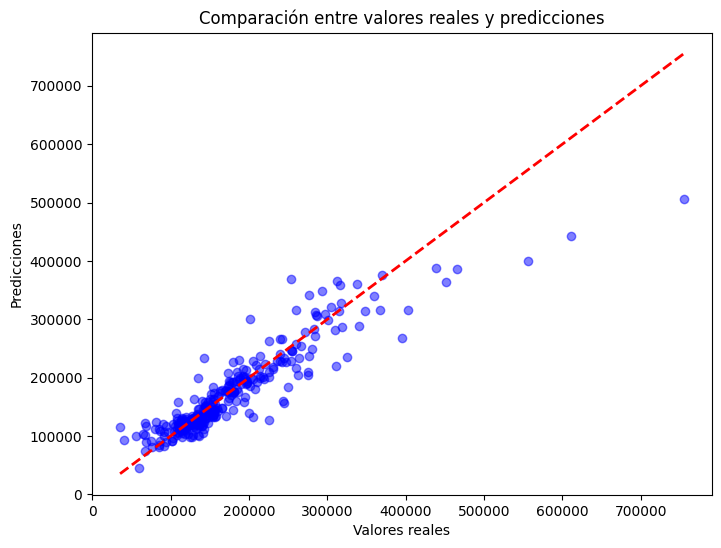

In [9]:
# Gráfico de Predicciones vs Valores Reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Línea diagonal
plt.title("Comparación entre valores reales y predicciones")
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.show()

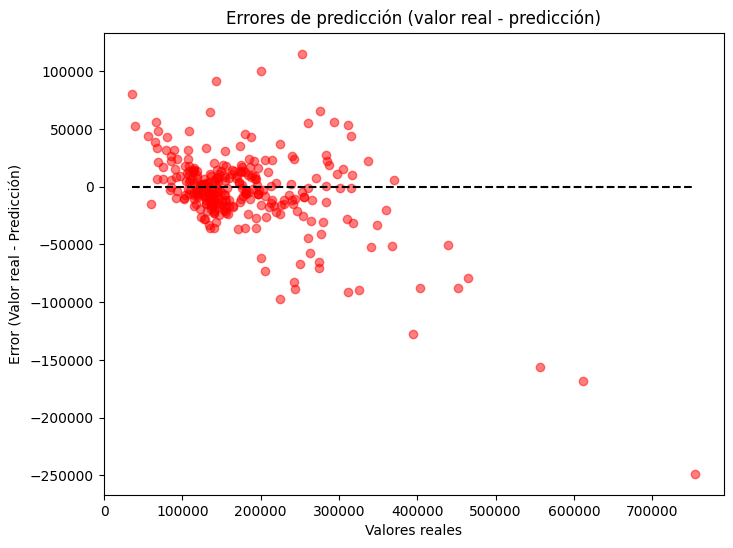

In [10]:
# Gráfico de Errores de Predicción
errores = y_pred - y_test
plt.figure(figsize=(8, 6))
plt.scatter(y_test, errores, color='red', alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='black', linestyles='dashed')
plt.title("Errores de predicción (valor real - predicción)")
plt.xlabel("Valores reales")
plt.ylabel("Error (Valor real - Predicción)")
plt.show()

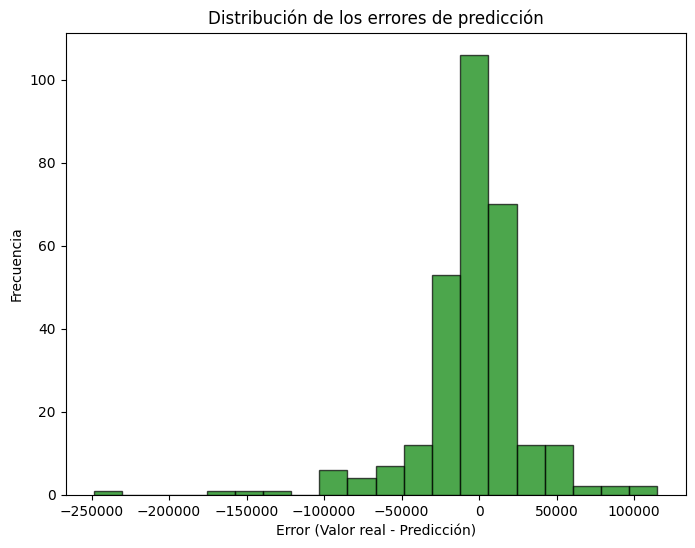

In [11]:
# Histograma de Errores de Predicción
plt.figure(figsize=(8, 6))
plt.hist(errores, bins=20, color='green', edgecolor='black', alpha=0.7)
plt.title("Distribución de los errores de predicción")
plt.xlabel("Error (Valor real - Predicción)")
plt.ylabel("Frecuencia")
plt.show()

Luego de hacer las predicciones con los hiperparámetros más optimos podemos ver que este modelo es bastante preciso. Tiene un RMSE, es decir una media de cuanto se aleja de los resultados reales, de solo $35000. Esto es bastante bajo si se toma en cuenta que estamos hablando de valores que se mantienen arriba de los $100000. Además, el R² nos dice que este modelo es capaz de acercarse bastante a los valores reales, ya que tiene un valor del 83.46%. Viendo las gráficas, nos podemos dar cuenta que cuando falla, tiende ha subestimar el valor. En la primera gráfica podemos ver como mientras más atípicos son los datos, más le cuesta calcular su valor. En la segunda gráfica podemos ver que donde más fallo fue por $250000 en un precio real de más de $700000. Esto, aunque si es bastante diferencia, solo ocurre una vez y en un dato bastante alejado de lo normal. En la última gráfica se puede observar mejor como se diferencian los errores en las predicciones y nuevamente vemos como tiende a tener errores más grandes dando un precio mayor de lo real, aunque generalmente es bastante acertado. 

**Resultados de la regresión lineal:**<br>
RMSE: 38749.621260535234<br>
R²: 0.761917951186283<br>

**Resultados del árbol de regresión:**<br>
*Profundidad 5:*<br>
RMSE: 39570.4617<br>
R²: 0.7959<br>

*Profundidad 6:*<br>
RMSE: 41841.0440<br>
R²: 0.7718<br>

**Regresión con Naive Bayes:**<br>
RMSE: 70905.23333345655<br>
R²: 0.34454520208526696<br>

Si comparamos el resultado de las otras regresiones, podemos ver que este ha sido el mejor modelo hasta ahora. Ambos parámetros, el RMSE y el R², han sido superiores a los anteriores. Sin embargo, hay un caso bastante curioso y es el del árbol de regresión. Aquí abajo podemos ver sus gráficas:

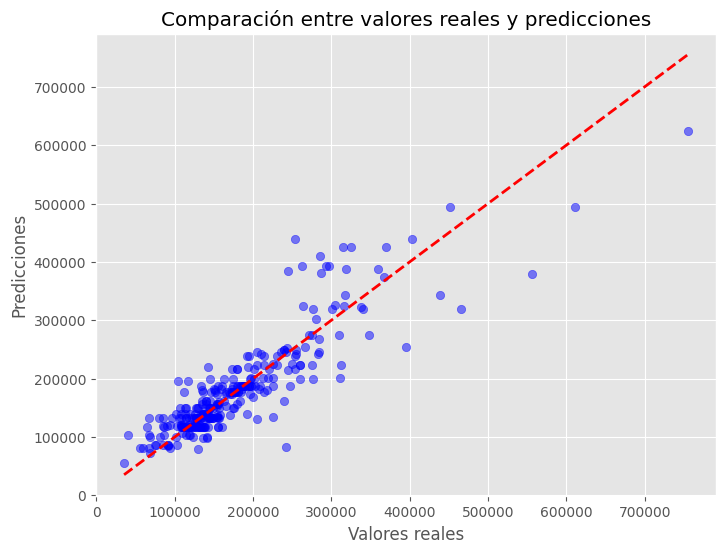

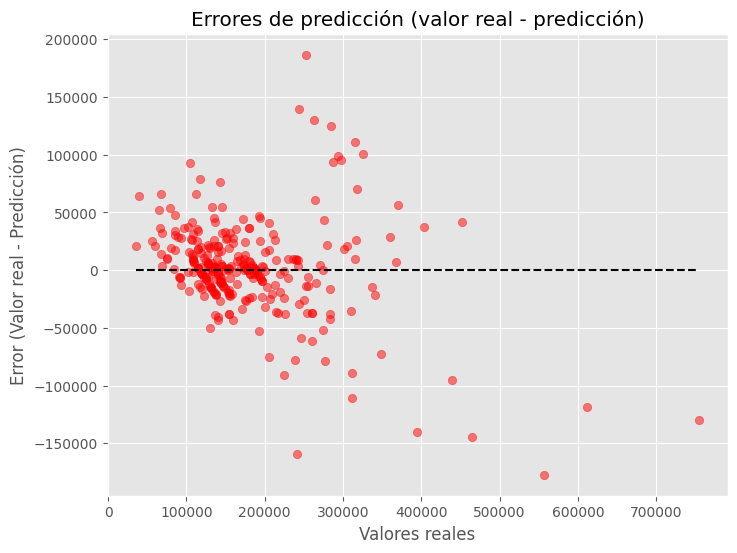

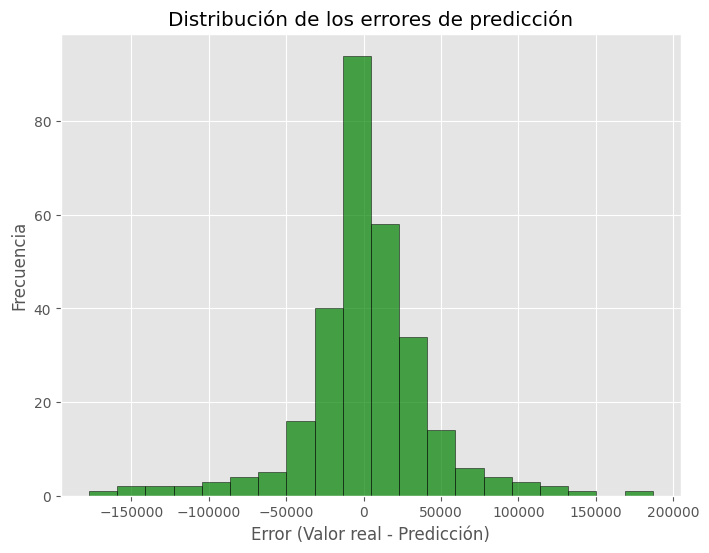

Aquí podemos ver como este modelo tienen errores más centrados, es decir que no tiende a subestimar más o sobreestimar más, sino que mantiene un equilibrio entre sus errores. Gracias a esto, logró estar más cerca de acertar los valores atípicos. Por lo tanto, aunque el modelo de KNN es mejor en general que el del árbol, el segundo es mejor para predecir valores más grandes.

## Modelo de clasificación

In [ ]:
mean_price = train['SalePrice'].mean()
std_price = train['SalePrice'].std()

low_price = mean_price - std_price
mid_price = mean_price + std_price

def categorizar_casas(precio):
    if precio <= low_price:
        return "Barata"
    elif precio <= mid_price:
        return "Normal"
    else:
        return "Cara"

train['Categoria'] = train['SalePrice'].apply(categorizar_casas)
columnas_interes = ['OverallQual', 'GrLivArea', 'YearBuilt', 'YearRemodAdd',  'TotalBsmtSF', 'TotRmsAbvGrd', 'GarageArea']

X_clf = train[columnas_interes]
y_clf = train["Categoria"]

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

train['Categoria'].value_counts()

Categoria
Normal    1145
Cara       191
Barata     124
Name: count, dtype: int64

Hacemos el pipeline con los datos normalizados

In [13]:
X_train_clf = StandardScaler().fit_transform(X_train_clf)
X_test_clf = StandardScaler().fit_transform(X_test_clf)

accuracies = []
cv_scores = []
k_values = range(1, 41)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, p=3, metric='euclidean')
    knn.fit(X_train_clf, y_train_clf)
    scores = cross_val_score(knn, X_train_clf, y_train_clf, cv=5, scoring='accuracy')
    cv_scores.append(np.mean(scores))
    y_pred = knn.predict(X_test_clf)
    accuracies.append(accuracy_score(y_test_clf, y_pred))

Probamos diferentes valores de k para encontrar el que tenga mayor precisión y menor coste computacional.

In [14]:
# Mejor K basado en la validación cruzada
best_k_cv = k_values[np.argmax(cv_scores)]
print(f"Mejor valor de K: {best_k_cv}")

Mejor valor de K: 6


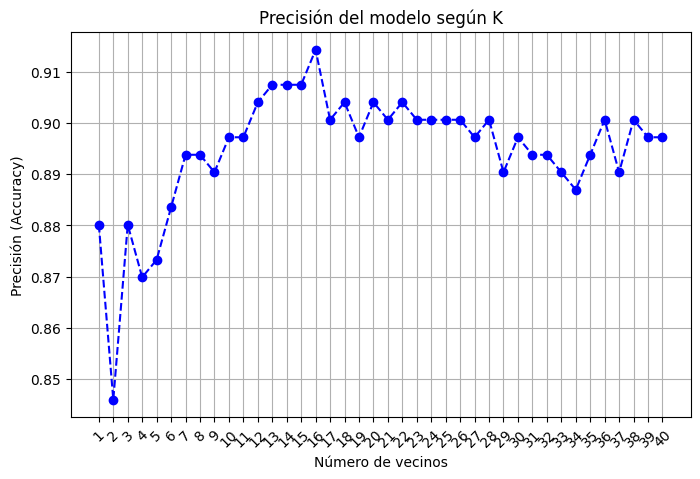

In [15]:
# Graficar la precisión en función de K
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='dashed', color='b')
plt.xlabel('Número de vecinos')
plt.ylabel('Precisión (Accuracy)')
plt.title('Precisión del modelo según K')
plt.xticks(k_values, rotation=45)  # Para que los valores de K se vean bien
plt.grid(True)
plt.show()

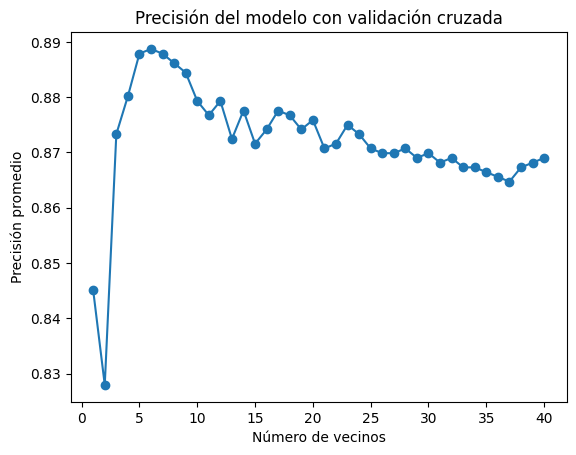

In [16]:
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('Número de vecinos')
plt.ylabel('Precisión promedio')
plt.title('Precisión del modelo con validación cruzada')
plt.show()

In [17]:
# Evaluar precisión del k que se decidio como mejor segun la validación cruzada
best_knn = KNeighborsClassifier(n_neighbors=best_k_cv, p=3, metric='euclidean')
best_knn.fit(X_train_clf, y_train_clf)
y_pred_best = best_knn.predict(X_test_clf)

best_accuracy = accuracy_score(y_test_clf, y_pred_best)
print(f"Precisión del modelo con K={best_k_cv}: {best_accuracy:.4f}")

Precisión del modelo con K=6: 0.8836


La teoría tambien nos dice que otro valor bueno para K es la raíz cuadrada de la cantidad de datos de prueba.

In [18]:
# Definimos el mejor k segun la raíz cuadrada
best_k_sqr = math.sqrt(len(y_test_clf))
best_k_sqr = int(best_k_sqr)

# Probamos su eficiencia
best_knn = KNeighborsClassifier(n_neighbors=best_k_sqr, p=3, metric='euclidean')
best_knn.fit(X_train_clf, y_train_clf)
y_pred_best = best_knn.predict(X_test_clf)

best_accuracy = accuracy_score(y_test_clf, y_pred_best)
print(f"Precisión del modelo con K={best_k_sqr}: {best_accuracy:.4f}")

Precisión del modelo con K=17: 0.9007


Podemos ver que en ambos casos, la accuracy del modelo es bastante alta. La diferencia es que un K más grande puede llegar a tener un coste computacional mayor y la diferencia de precisión de ambos modelos no es tan exagerada. Por lo tanto, si no se cuenta con una maquina potente, se recomienda usar K=6, de lo contrario K=17 dara resultados ligeramente más exactos.

### Matriz de Confusión y Análisis de Errores

Distribución en el conjunto de prueba:
Categoria
Normal    226
Cara       40
Barata     26
Name: count, dtype: int64


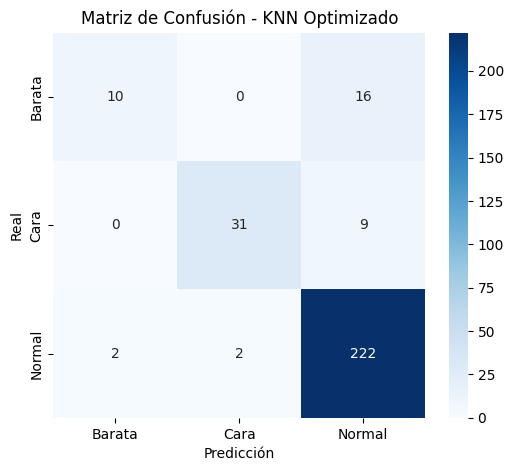

Reporte de Clasificación:
               precision    recall  f1-score   support

      Barata       0.83      0.38      0.53        26
        Cara       0.94      0.78      0.85        40
      Normal       0.90      0.98      0.94       226

    accuracy                           0.90       292
   macro avg       0.89      0.71      0.77       292
weighted avg       0.90      0.90      0.89       292



In [ ]:
print("Distribución de categorias en el conjunto de prueba:")
print(y_test_clf.value_counts())


conf_matrix = confusion_matrix(y_test_clf, y_pred_best)
class_report = classification_report(y_test_clf, y_pred_best)

labels = sorted(y_test_clf.unique())


plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - KNN Optimizado")
plt.show()

print("Reporte de Clasificación:\n", class_report)


### Análisis de la eficiencia del modelo de clasificación usando la matriz de confusión

El modelo KNN logró una precisión global del **90%**, lo que indica un buen desempeño en general. Sin embargo, al ver la matriz de confusión, observamos que el modelo tiene dificultades al clasificar correctamente las casas **baratas**, ya que solo **10 de 26** fueron clasificadas correctamente, mientras que **16 fueron erróneamente categorizadas como "Normales"**, lo que resulta en un recall de **0.38** para esta clase. En contraste, la categoría **"Normal"** fue la mejor clasificada, con un **98% de recall** y **90% de precisión**, lo que se debe en parte a que es la categoría dominante en el dataset. La clase **"Cara"** también mostró un buen desempeño, con una precisión del **94%**, aunque con un **22% de errores** al ser clasificadas como "Normales". Esto sugiere que el modelo está favoreciendo la clase "Normal" debido al desbalance en la cantidad de datos, lo que afecta especialmente a la detección de casas baratas. Este error es crítico, ya que si el objetivo fuera encontrar viviendas accesibles, el modelo no sería confiable. Para mejorar el rendimiento.

### Análisis de Sobreajuste

Precisión en entrenamiento: 0.9092465753424658
Precisión en prueba: 0.8801369863013698

Precisión Promedio (Validación Cruzada): 0.8792707530904955
Desviación Estándar: 0.012024449036450632


c:\Users\pablo\OneDrive - UVG\Escritorio\UVG\7mo Semestre\Mineria de datos\Modulo 1\Proyecto 2\HT6\HT6-DM\venv\Lib\site-packages\sklearn\impute\_base.py:572: FutureWarning: Currently, when `keep_empty_feature=False` and `strategy="constant"`, empty features are not dropped. This behaviour will change in version 1.8. Set `keep_empty_feature=True` to preserve this behaviour.
  warnings.warn(
c:\Users\pablo\OneDrive - UVG\Escritorio\UVG\7mo Semestre\Mineria de datos\Modulo 1\Proyecto 2\HT6\HT6-DM\venv\Lib\site-packages\sklearn\impute\_base.py:572: FutureWarning: Currently, when `keep_empty_feature=False` and `strategy="constant"`, empty features are not dropped. This behaviour will change in version 1.8. Set `keep_empty_feature=True` to preserve this behaviour.
  warnings.warn(


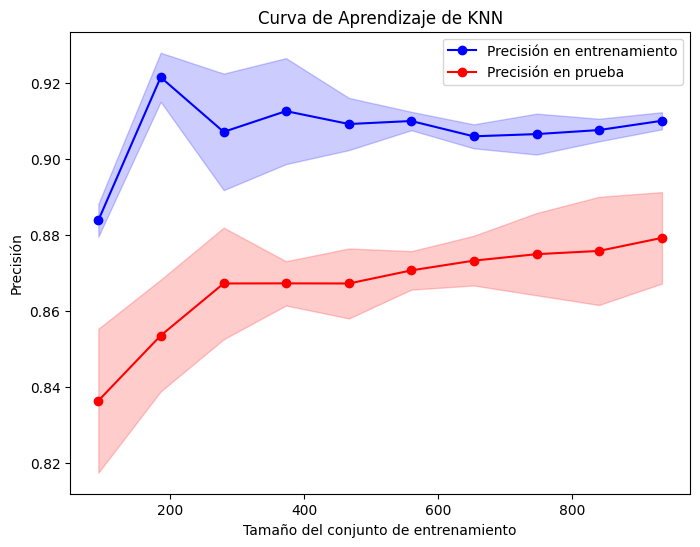

In [ ]:

y_train_pred_best = best_knn.predict(X_train_clf)

# Precisión
train_accuracy = accuracy_score(y_train_clf, y_train_pred_best)
test_accuracy = accuracy_score(y_test_clf, y_pred_best)

print("Precisión en entrenamiento:", train_accuracy)
print("Precisión en prueba:", test_accuracy)

# Validación Cruzada 
cv_scores = cross_val_score(best_knn, X_train_clf, y_train_clf, cv=5, scoring='accuracy')

cv_mean = np.mean(cv_scores)
cv_std = np.std(cv_scores)

print("\nPrecisión Promedio (Validación Cruzada):", cv_mean)
print("Desviación Estándar:", cv_std)

#Curva de Aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    best_knn, X_train_clf, y_train_clf, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Precisión en entrenamiento')
plt.plot(train_sizes, test_mean, 'o-', color='red', label='Precisión en prueba')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.2)
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Precisión')
plt.title('Curva de Aprendizaje de KNN Optimizado')
plt.legend()
plt.show()


### ¿Está sobreajustado el modelo KNN?

Para ver si el modelo KNN está sobreajustado, comparé la precisión en entrenamiento y en prueba, además de revisar la validación cruzada y la curva de aprendizaje. La precisión en entrenamiento es **90.92%**, mientras que en prueba es **88.01%**, lo que significa que el modelo funciona bien con nuevos datos y no está memorizando demasiado los datos de entrenamiento. Además, la validación cruzada da una precisión promedio de **87.92%**, con una desviación baja, lo que indica que el modelo es estable y no varía mucho con diferentes conjuntos de datos.

La curva de aprendizaje muestra que la precisión en entrenamiento siempre es un poco más alta que en prueba, pero no hay una diferencia exagerada. Esto significa que el modelo generaliza bien, aunque podría afinarse un poco más. Si quisiera mejorar aún más su rendimiento, podría ajustar el número de vecinos **(K)** o probar alguna técnica para reducir la cantidad de información innecesaria en los datos.



### Validación Cruzada y Comparación

In [ ]:
cv_scores = cross_val_score(best_knn, X_train_clf, y_train_clf, cv=5, scoring='accuracy')

cv_mean = np.mean(cv_scores)
cv_std = np.std(cv_scores)

print("\nPrecisión Promedio (Validación Cruzada):", cv_mean)
print("Desviación Estándar:", cv_std)

Precisión Promedio (Validación Cruzada): 0.8792707530904955
Desviación Estándar: 0.012024449036450632


### Comparación del modelo con validación cruzada

Al aplicar validación cruzada al modelo KNN, obtuvimos una **precisión promedio de 87.92%**, con una **desviación estándar de 1.2%**. Esto significa que el modelo es bastante estable, ya que su rendimiento no varía demasiado al entrenarlo con diferentes subconjuntos de datos. Comparando estos resultados con el modelo anterior (que tenía una precisión en prueba de **88.01%**), podemos ver que ambos tienen un desempeño muy similar, lo que indica que el modelo no está memorizando datos específicos del conjunto de entrenamiento y generaliza bien a datos nuevos.

Si bien la validación cruzada no mejoró significativamente la precisión, sí nos da más confianza en la estabilidad del modelo. La pequeña desviación estándar sugiere que los resultados son consistentes en distintas divisiones de los datos. Esto confirma que **el modelo KNN está bien ajustado y no presenta problemas graves de sobreajuste o variabilidad excesiva**. Sin embargo, si se quisiera mejorar aún más su rendimiento, se podrían probar técnicas como la selección de características o el ajuste fino de hiperparámetros.


#### Optimización de Hiperparámetros para Mejorar KNN

In [27]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 15, 21],  
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean', 'manhattan', 'minkowski']  
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train_clf, y_train_clf)

best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_

print("Mejores Hiperparámetros:", best_params_knn)
print("Mejor Precisión en Validación Cruzada:", best_score_knn)

Mejores Hiperparámetros: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
Mejor Precisión en Validación Cruzada: 0.8947140603792965


In [28]:
best_knn = KNeighborsClassifier(
    n_neighbors=best_params_knn['n_neighbors'],
    weights=best_params_knn['weights'],
    metric=best_params_knn['metric']
)

best_knn.fit(X_train_clf, y_train_clf)


KNeighborsClassifier(metric='manhattan', n_neighbors=7)

### Ajuste de Hiperparámetros y Comparación de Resultados

Para mejorar el rendimiento del modelo KNN, probamos distintos valores de hiperparámetros, incluyendo el número de vecinos (`n_neighbors`), la métrica de distancia (`metric`) y el método de ponderación (`weights`). Después de realizar una **búsqueda en cuadrícula (GridSearchCV)**, encontramos que la mejor configuración fue:  
- **Métrica:** Manhattan  
- **Número de vecinos (K):** 7  
- **Ponderación:** Uniform  

Con esta configuración óptima, el modelo logró una **precisión promedio en validación cruzada del 89.47%**, lo que representa una ligera mejora respecto al modelo anterior (**87.92% de precisión sin optimización**). 

🔹 **¿Mejoraron los resultados?**  
Sí, la precisión aumentó después de ajustar los hiperparámetros. Este resultado sugiere que el modelo ahora está mejor adaptado a los datos, lo que indica que la distancia Manhattan y el uso de 7 vecinos proporcionan una mejor representación de la relación entre las variables.  

🔹 **¿Qué implican estos cambios?**  
- **Elegir Manhattan en lugar de Euclidean o Minkowski** significa que el modelo mide la distancia entre puntos basándose en diferencias absolutas en cada dimensión en lugar de la distancia directa en el espacio. Esto suele funcionar mejor cuando las variables tienen diferentes escalas o cuando los datos tienen una estructura más alineada con los ejes.  
- **Reducir o aumentar el número de vecinos** afecta la suavidad de la clasificación. Un valor de **7 parece ser un buen equilibrio** entre evitar el sobreajuste (cuando K es muy bajo) y no hacer que el modelo pierda precisión (cuando K es muy alto).  
- **El método de ponderación uniforme** asigna igual importancia a todos los vecinos más cercanos, lo que sugiere que los puntos más alejados dentro del radio de K no afectan significativamente la clasificación.  

### Comparación con otros Modelos (Árbol de Decisión, Random Forest, Naive Bayes)

KNN - Accuracy: 0.9075, Precision: 0.9048, Recall: 0.9075, F1-score: 0.9020, Tiempo: 0.0160 seg


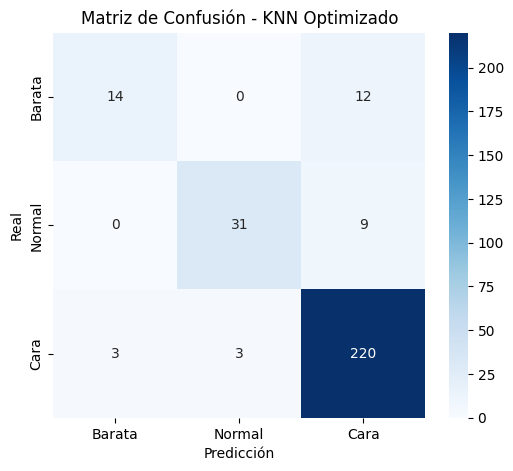

In [30]:
start_time = time.time()

y_pred_knn = best_knn.predict(X_test_clf)

knn_accuracy = accuracy_score(y_test_clf, y_pred_knn)
knn_precision = precision_score(y_test_clf, y_pred_knn, average='weighted')
knn_recall = recall_score(y_test_clf, y_pred_knn, average='weighted')
knn_f1 = f1_score(y_test_clf, y_pred_knn, average='weighted')

knn_time = time.time() - start_time

conf_matrix_knn = confusion_matrix(y_test_clf, y_pred_knn)

print(f"KNN - Accuracy: {knn_accuracy:.4f}, Precision: {knn_precision:.4f}, Recall: {knn_recall:.4f}, F1-score: {knn_f1:.4f}, Tiempo: {knn_time:.4f} seg")

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", xticklabels=["Barata", "Normal", "Cara"], yticklabels=["Barata", "Normal", "Cara"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - KNN Optimizado")
plt.show()


#### Metricas de los modelos Random Forest y Naive Bayes: 
- 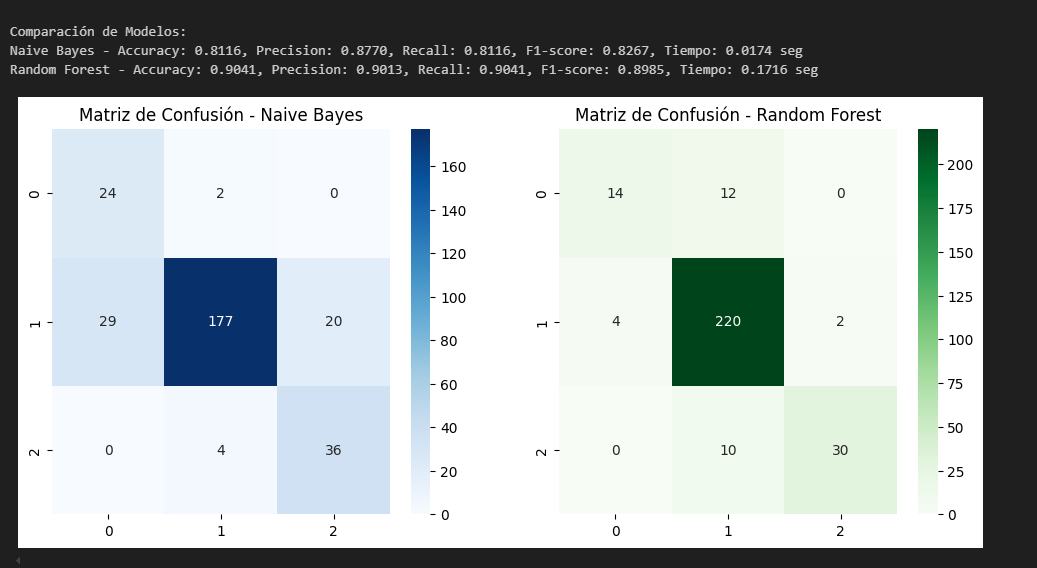

### Comparación de Modelos  

Después de probar KNN optimizado y compararlo con Naive Bayes y Random Forest, los resultados muestran que KNN alcanzó una **precisión del 90.75%**, lo que lo pone por encima de Naive Bayes (81.16%) y muy cerca de Random Forest (90.41%). Aunque KNN mejoró bastante con la optimización de hiperparámetros, sigue sin superar del todo a Random Forest en términos de estabilidad en la clasificación.  

Si vemos la **matriz de confusión**, KNN redujo los errores respecto a Naive Bayes, pero sigue teniendo ciertas dificultades con la clase "Barata", mientras que Random Forest muestra una distribución de errores más balanceada.  

En cuanto al **tiempo de ejecución**, KNN fue **mucho más rápido que Random Forest** (0.0160 seg vs. 0.1716 seg), lo que lo hace una opción más ligera si se necesita rapidez sin perder tanta precisión. Naive Bayes sigue siendo el más rápido, pero su precisión es mucho más baja.  

**Conclusión:** Si lo que se busca es el mejor desempeño en general, **Random Forest sigue siendo la mejor opción**, pero si se quiere una alternativa rápida con buena precisión, **KNN optimizado es una muy buena opción**. Naive Bayes, aunque rápido, no es el mejor en términos de clasificación.  
